In [252]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [253]:
import numpy as np
import pandas as pd

In [254]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [255]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [256]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [257]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [258]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [259]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [260]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [261]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [262]:
# Save references to each table
m_table_ref = Base.classes.measurement
s_table_ref = Base.classes.station


In [263]:
# Create our session (link) from Python to the DB
session = Session(engine)


<h1>Experimentation<h1>

In [264]:
# Total dates
session.query(func.count(m_table_ref.date)).all()

[(19550)]

In [265]:
# Earliest Date
session.query(m_table_ref.date).order_by(m_table_ref.date).first()

('2010-01-01')

In [266]:
# Latest Date
session.query(m_table_ref.date).order_by(m_table_ref.date.desc()).first()

('2017-08-23')

In [267]:
# first year's precipitation
one_yr_prcp = session.query(m_table_ref.prcp, m_table_ref.date).\
    filter(m_table_ref.date < '2011-01-01').\
    order_by(m_table_ref.date).all()

In [ ]:
yr1prcp_df= pd.DataFrame(one_yr_prcp)
yr1prcp_df = pd.DataFrame(yr1prcp_df.groupby('date').mean())
yr1prcp_df

In [ ]:
ax = yr1prcp_df.plot(rot=45)
ax.set_ylabel("Average Precipitation")


In [269]:

last_yr_prcp = session.query(m_table_ref.prcp, m_table_ref.date).\
    filter(m_table_ref.date < '2017-08-23').\
        filter(m_table_ref.date > '2016-08-23').\
        order_by(m_table_ref.date).all()

# Exploratory Climate Analysis

## Design a query to retrieve the last 12 months of precipitation data and plot the results 


In [273]:
# Calculate the date 1 year ago from the last data point in the database

# time delta, date 1 year ago from last day
dt.date(2017,8,23)
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

print(year_ago)



In [316]:
# Perform a query to retrieve the data and precipitation scores

# query last years precipitation 
last_yr_prcp = session.query(m_table_ref.prcp, m_table_ref.date).\
    filter(m_table_ref.date <= '2017-08-23').\
        filter(m_table_ref.date > '2016-08-23').\
        order_by(m_table_ref.date).all()


In [317]:
# Save the query results as a Pandas DataFrame and set the index to the date column

last_yr_prcp_df = pd.DataFrame(last_yr_prcp)

# group by average date for viewing pleasure 
last_yr_prcp_df = pd.DataFrame(last_yr_prcp_df.groupby('date').mean())

last_yr_prcp_df

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [318]:
# Sort the dataframe by date
# isn't it sorted already? 


Text(0, 0.5, 'Average Precipitation')

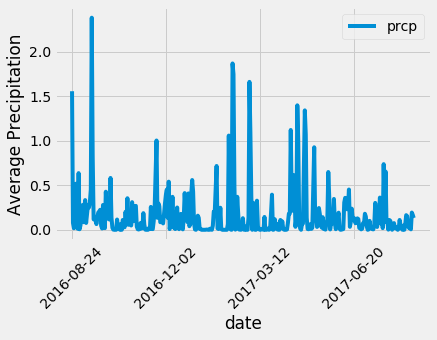

In [319]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = last_yr_prcp_df.plot(rot=45)
ax.set_ylabel("Average Precipitation")


In [395]:
# Use Pandas to calculate the summary statistics for the precipitation data
whole_prcp = session.query(m_table_ref.station, m_table_ref.prcp, m_table_ref.date, m_table_ref.tobs).all()

whole_prcp_df= pd.DataFrame(whole_prcp)
whole_prcp_df = whole_prcp_df.groupby('station').mean()
whole_prcp_df

,prcp,tobs
station,,
USC00511918,0.047971,71.615968
USC00513117,0.141921,72.689184
USC00514830,0.121058,74.873297
USC00516128,0.429988,70.915008
USC00517948,0.063602,74.684402
USC00518838,0.207222,72.724070
USC00519281,0.212352,71.663781
USC00519397,0.049020,74.553231
USC00519523,0.114961,74.543649


In [381]:
# Design a query to show how many stations are available in this dataset?
# in the measurement data or the station data? 
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

whole_station = session.query(s_table_ref.station, s_table_ref.name, s_table_ref.latitude, s_table_ref.longitude, s_table_ref.elevation).all()
whole_station_df= pd.DataFrame(whole_station)
whole_station_df



,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [403]:
station_names = whole_station_df['name']
station_names

0                      WAIKIKI 717.2, HI US
1                      KANEOHE 838.1, HI US
2    KUALOA RANCH HEADQUARTERS 886.9, HI US
3                         PEARL CITY, HI US
4                UPPER WAHIAWA 874.3, HI US
5        WAIMANALO EXPERIMENTAL FARM, HI US
6                       WAIHEE 837.5, HI US
7         HONOLULU OBSERVATORY 702.2, HI US
8              MANOA LYON ARBO 785.2, HI US
Name: name, dtype: object

In [390]:
whole_prcp_df

,prcp,date,tobs
station,,,
USC00511918,1932,1979,1979
USC00513117,2696,2709,2709
USC00514830,1937,2202,2202
USC00516128,2484,2612,2612
USC00517948,683,1372,1372
USC00518838,342,511,511
USC00519281,2772,2772,2772
USC00519397,2685,2724,2724
USC00519523,2572,2669,2669


In [391]:
station_group_df = whole_station_df.groupby('station').mean()
station_group_df


,latitude,longitude,elevation
station,,,
USC00511918,21.31520,-157.99920,0.9
USC00513117,21.42340,-157.80150,14.6
USC00514830,21.52130,-157.83740,7.0
USC00516128,21.33310,-157.80250,152.4
USC00517948,21.39340,-157.97510,11.9
USC00518838,21.49920,-158.01110,306.6
USC00519281,21.45167,-157.84889,32.9
USC00519397,21.27160,-157.81680,3.0
USC00519523,21.33556,-157.71139,19.5


In [406]:
station_prcp_df = whole_prcp_df.join(station_group_df)
station_prcp_df

,prcp,tobs,latitude,longitude,elevation,names
station,,,,,,
USC00511918,0.047971,71.615968,21.31520,-157.99920,0.9,NaN
USC00513117,0.141921,72.689184,21.42340,-157.80150,14.6,NaN
USC00514830,0.121058,74.873297,21.52130,-157.83740,7.0,NaN
USC00516128,0.429988,70.915008,21.33310,-157.80250,152.4,NaN
USC00517948,0.063602,74.684402,21.39340,-157.97510,11.9,NaN
USC00518838,0.207222,72.724070,21.49920,-158.01110,306.6,NaN
USC00519281,0.212352,71.663781,21.45167,-157.84889,32.9,NaN
USC00519397,0.049020,74.553231,21.27160,-157.81680,3.0,NaN
USC00519523,0.114961,74.543649,21.33556,-157.71139,19.5,NaN


In [413]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

whole_prcp = session.query(m_table_ref.station, m_table_ref.prcp, m_table_ref.date, m_table_ref.tobs).all()

whole_prcp_df= pd.DataFrame(whole_prcp)
whole_prcp_df = whole_prcp_df.groupby('station').count()
prcp_sort_counts_df = whole_prcp_df.sort_values(by = 'prcp', ascending=False)
prcp_sort_counts_df


,prcp,date,tobs
station,,,
USC00519281,2772,2772,2772
USC00513117,2696,2709,2709
USC00519397,2685,2724,2724
USC00519523,2572,2669,2669
USC00516128,2484,2612,2612
USC00514830,1937,2202,2202
USC00511918,1932,1979,1979
USC00517948,683,1372,1372
USC00518838,342,511,511


In [446]:
most_active_station = prcp_sort_counts_df.head(1).index.values[0]
most_active_station

'USC00519281'

In [466]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


whole_prcp = session.query(m_table_ref.station, m_table_ref.prcp, m_table_ref.date, m_table_ref.tobs).all()
whole_prcp_df= pd.DataFrame(whole_prcp)
active_station_df = whole_prcp_df[whole_prcp_df['station']== most_active_station ]
print("Lowest Temperature: "+str(active_station_df['tobs'].min()))
print("Highest Temperature: "+str(active_station_df['tobs'].max()))
print("Average Temperature: "+str(round(active_station_df['tobs'].mean(), 2)))



Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


In [282]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [283]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [284]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [285]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [286]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [287]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [288]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [289]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [290]:
# Plot the daily normals as an area plot with `stacked=False`
